In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


In [14]:
#visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import seaborn as sns

In [18]:
#machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Acquiring data

In [26]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

combine = [train_df , test_df] 
print(type(combine))

<class 'list'>


In [27]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [32]:
#finding the catergorical value and nummerical value

categorical = [x for x in train_df.columns if train_df.dtypes[x] == 'object']
print(categorical)



['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Which features are categorical?

Which features are numerical?

Which features are mixed data types?

Numerical, alphanumeric data within same feature



Which features may contain errors or typos?


Which features contain blank, null or empty values?


What are the data types for various features?











In [33]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
#new way of printing a horizontal line
print('_'*40)

________________________________________


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


What is the distribution of numerical feature values across the samples?

In [36]:
train_df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What is the distribution of categorical features?

Correlating.

We want to know how well does each feature correlate with Survival.

In [37]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Completing.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

PassengerId may be dropped from training dataset as it does not contribute to survival.

Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.



Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.


We may want to engineer the Name feature to extract Title as a new feature.


We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.


We may also want to create a Fare range feature if it helps our analysis.

Classifying.

We may also add to our assumptions based on the problem description noted earlier.


Women (Sex=female) were more likely to have survived.

Children (Age<?) were more likely to have survived.


The upper-class passengers (Pclass=1) were more likely to have survived.

Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.


Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

    
Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

                                                                                                             
SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

# categorical Value

# Grouping the survived grouped by Pclass

In [51]:
train_df[['Pclass' ,'Survived']]
temp = train_df[['Pclass' , 'Survived']].groupby(['Pclass'])

      
train_df[['Pclass' , 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)               



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [54]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)                                

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [61]:
train_df[['Parch','Survived']].groupby(['Parch']).mean()


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [62]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [65]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived')

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [66]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Numerical Variable

# Analyze by visualizing data

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Observations.

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 15-25 year olds did not survive.

Most passengers are in 15-35 age range.



Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.


We should consider Age (our assumption classifying #2) in our model training.

Complete the Age feature for null values (completing #1).

We should band age groups (creating #3).

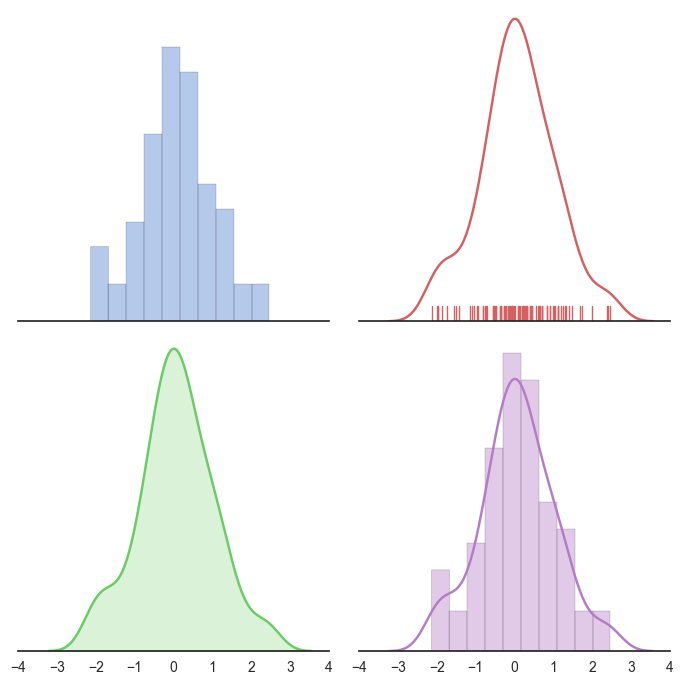

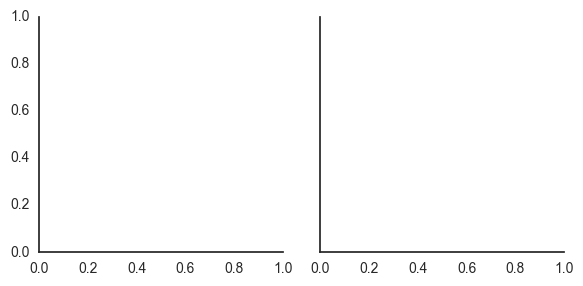

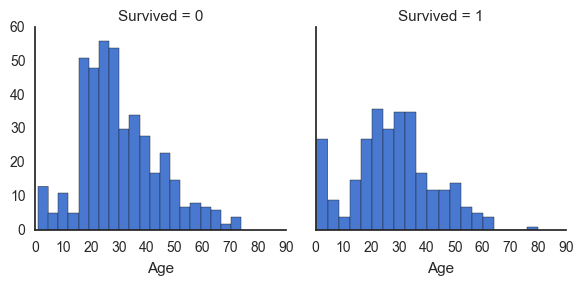

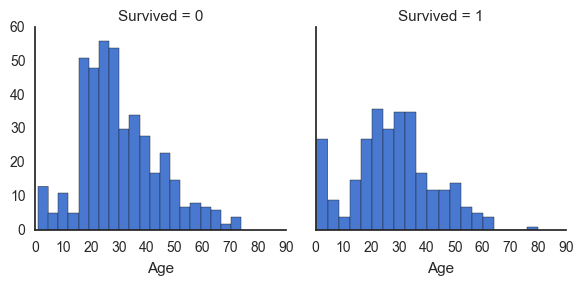

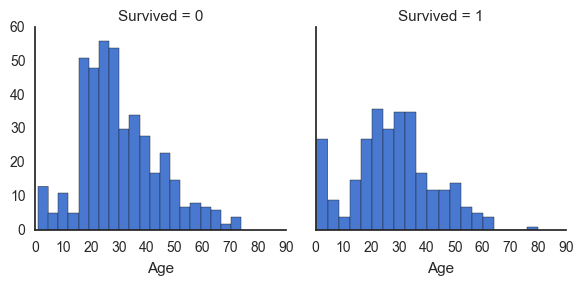

In [73]:
g = sns.FacetGrid(train_df , col='Survived')
g.map(plt.hist , 'Age' , bins=20)
plt.show()

# Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.



Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.

Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.

Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.

Pclass varies in terms of Age distribution of passengers.

Decisions.

Consider Pclass for model training.


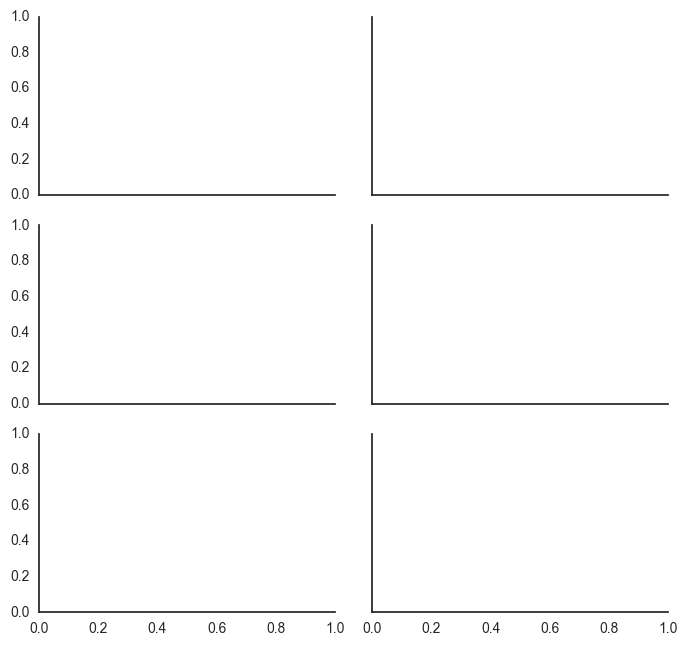

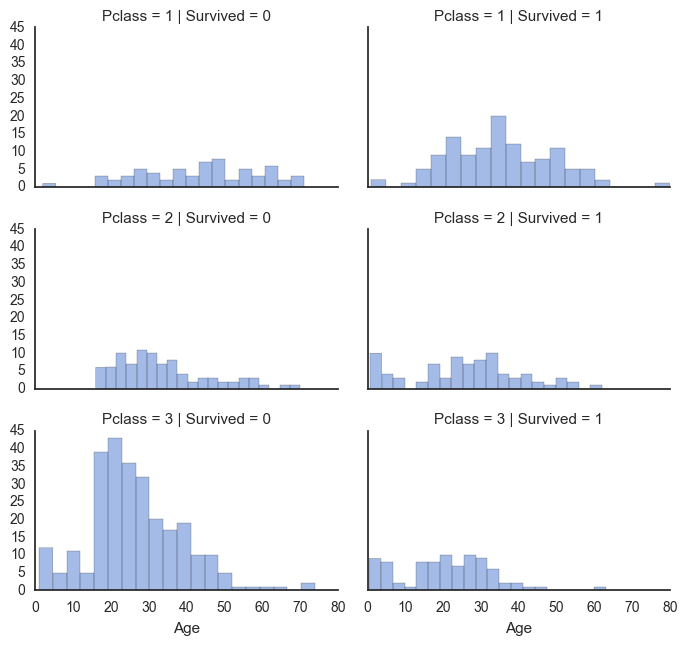

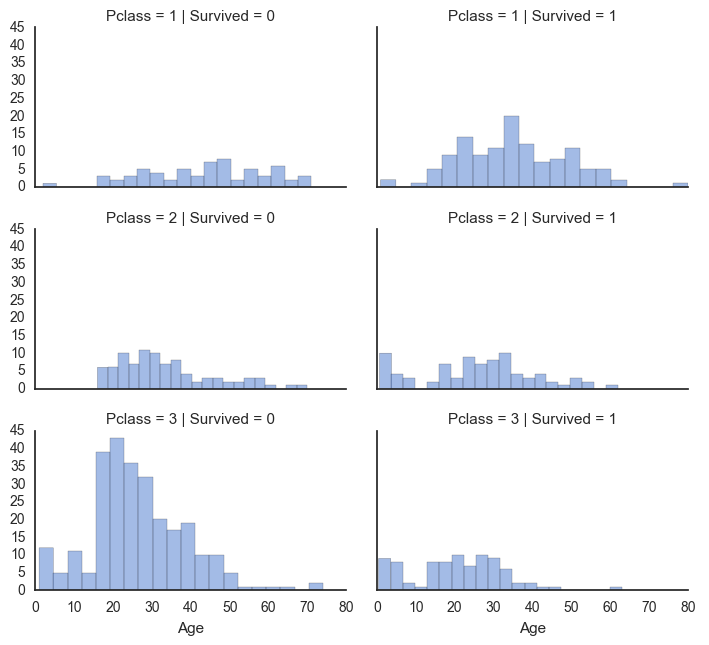

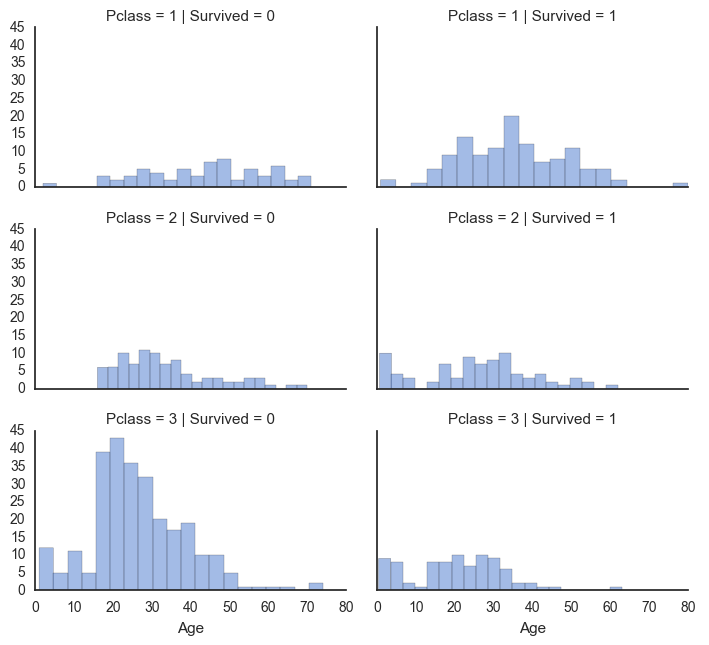

In [79]:
grid = sns.FacetGrid(train_df , col='Survived' , row='Pclass' , size=2.2 , aspect=1.6)
grid.map(plt.hist , 'Age' , alpha=0.5 , bins=20)
grid.add_legend()
plt.show()